# 2022-01-08 • Lognormal input firing rates

In [3]:
include("nb_init.jl")

[ Info: import Distributions
[ Info: import PyPlot
[ Info: import DataFrames, PrettyTables
[ Info: import BenchmarkTools, Profile, FilePaths
[ Info: import Unitful, Sciplotlib
[ Info: using VoltageToMap


## Distributions

We want Poisson firing, i.e. ISIs with an exponential distribution.  
Firing rates lognormally distributed (instead of all the same, as before).

In [4]:
"""
`μ` and `σ` are mean and standard deviation of the underlying Gaussian.
`μₓ` is the mean of the log of the Gaussian.
"""
function LogNormal_with_mean(μₓ, σ)
    μ = log(μₓ / unit(μₓ)) - σ^2 / 2
    LogNormal(μ, σ, unit(μₓ))
end;

In [10]:
input_spike_rate = LogNormal_with_mean(4Hz, √0.6)  # our hand-picked params

LogNormal{Float64, Unitful.FreeUnits{(Hz,), 𝐓^-1, nothing}}(μ=1.0862943611198905, σ=0.7745966692414834)

In [11]:
roxin = LogNormal_with_mean(5Hz, √1.04)

LogNormal{Float64, Unitful.FreeUnits{(Hz,), 𝐓^-1, nothing}}(μ=1.0894379124341003, σ=1.019803902718557)

In [12]:
σ² = (σ_X, μ_X) -> log(1 + σ_X^2 / μ_X^2)
σ²_oconnor = σ²(7.4Hz, 12.6Hz)

0.296337

In [13]:
oconnor = LogNormal_with_mean(7.4Hz, √σ²_oconnor)

LogNormal{Float64, Unitful.FreeUnits{(Hz,), 𝐓^-1, nothing}}(μ=1.8533115616194222, σ=0.5443683285987568)

## Plot

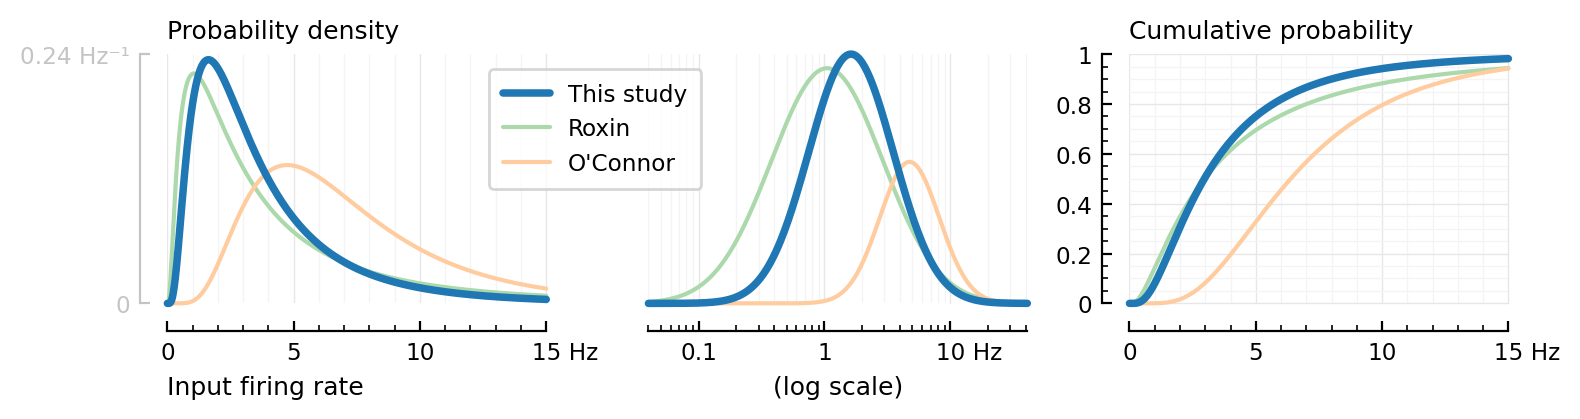

In [14]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(8, 2.2))

rlin = (0:0.01:15) * Hz
rlog = (log10(0.04):0.01:log10(41) .|> exp10) * Hz
function plot_firing_rate_distr(distr; kw...)
    plot(rlin, pdf.(distr, rlin), ax1; clip_on=false, kw...)
    plot(rlog, pdf.(distr, rlog), ax2; clip_on=false, xscale="log", kw...)
    plot(rlin, cdf.(distr, rlin), ax3; clip_on=false, ylim=(0,1), kw...)
end

plot_firing_rate_distr(roxin, label="Roxin", c=lighten(C2, 0.4))
plot_firing_rate_distr(oconnor, label="O'Connor", c=lighten(C1, 0.4))
plot_firing_rate_distr(input_spike_rate, label="This study", c=C0, lw=2.7)

set(ax1; xlabel="Input firing rate", ytickstyle=:range, hylabel="Probability density")
set(ax2; xlabel=("(log scale)", :loc=>:center), yaxis=:off)
set(ax3; hylabel="Cumulative probability")
deemph(:yaxis, ax1)
legend(ax2, loc="center", bbox_to_anchor=(-0.14, 0.7), reorder=[3=>1])
ax2.get_legend().set_in_layout(false)
plt.tight_layout(w_pad=1)

savefig("log-normal.pdf", subdir="methods")

## Parameters

In [15]:
distrs = [oconnor, roxin, input_spike_rate]
(df = DataFrame(
    name=["oconnor", "roxin", "this study"],
    σ=stdlogx.(distrs),
    mean=mean.(distrs),
    median=median.(distrs),
    std=std.(distrs),
    var=var.(distrs),
)) |> printsimple

 name        σ      mean (Hz)   median (Hz)   std (Hz)   var (Hz²)  
────────────────────────────────────────────────────────────────────
 oconnor     0.544  7.4         6.38          4.35       18.9
 roxin       1.02   5           2.97          6.76       45.7
 this study  0.775  4           2.96          3.63       13.2